Dataset Overview:
Total Records: 2644
Columns: ['timestamp', 'value', 'classification', 'date']
--------------------------------------------------
Basic Findings:
Average Fear-Greed Score ≈ 46.98
Lowest Value = 5 (on 2019-08-22)
Highest Value = 95 (on 2019-06-26)
--------------------------------------------------
classification Frequency:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64
--------------------------------------------------


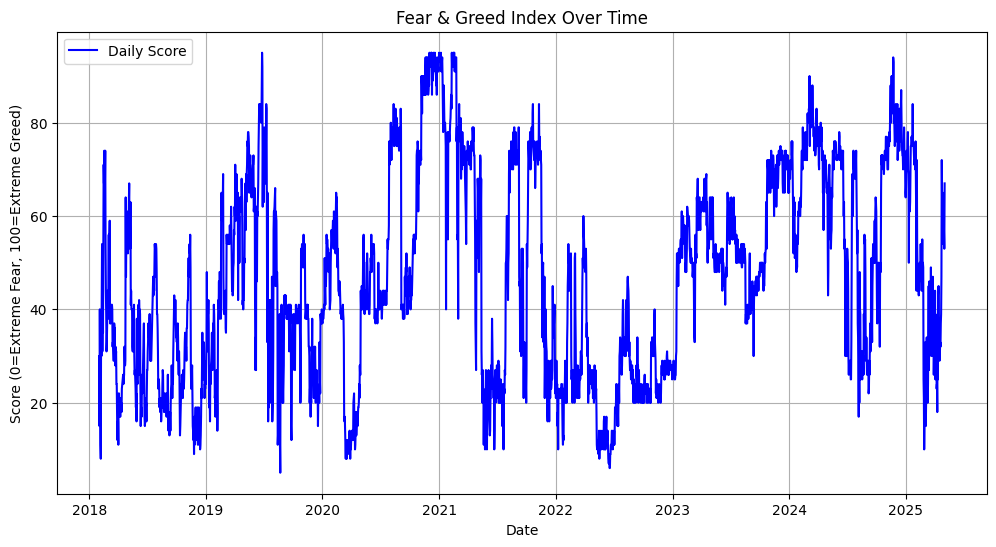

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv(r"C:\Users\MOHAMMED SOHAIL\Downloads\fear_greed_index.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values("date")


print("Dataset Overview:")
print(f"Total Records: {df.shape[0]}")
print(f"Columns: {list(df.columns)}")
print("-"*50)


avg_value = df['value'].mean()
min_value = df['value'].min()
max_value = df['value'].max()
min_date = df.loc[df['value'].idxmin(), 'date']
max_date = df.loc[df['value'].idxmax(), 'date']

print("Basic Findings:")
print(f"Average Fear-Greed Score ≈ {avg_value:.2f}")
print(f"Lowest Value = {min_value} (on {min_date.date()})")
print(f"Highest Value = {max_value} (on {max_date.date()})")
print("-"*50)

class_counts = df['classification'].value_counts()
print("classification Frequency:")
print(class_counts)
print("-"*50)

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['value'], label="Daily Score", color="blue")
plt.title("Fear & Greed Index Over Time")
plt.xlabel("Date")
plt.ylabel("Score (0=Extreme Fear, 100=Extreme Greed)")
plt.legend()
plt.grid(True)
plt.savefig("outputs/fear_greed_trend.png")
plt.show()

C:\Users\MOHAMMED SOHAIL\AppData\Local\Temp\ipykernel_26104\1722343532.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='classification',


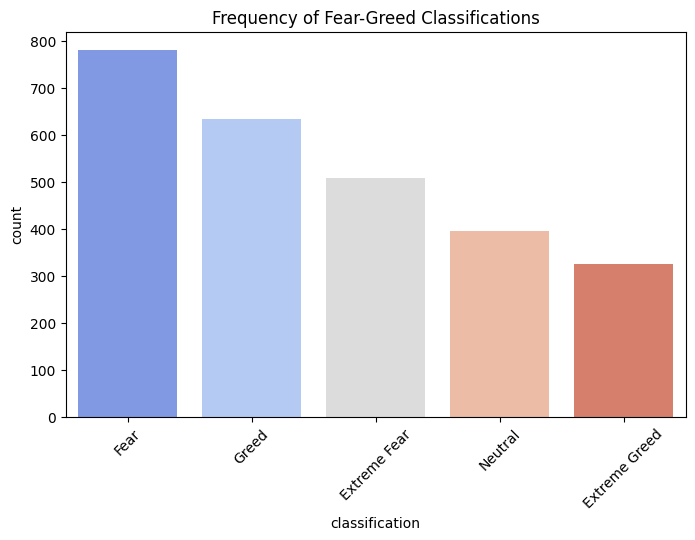

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='classification',
              order=df['classification'].value_counts().index,
              palette="coolwarm")
plt.title("Frequency of Fear-Greed Classifications")
plt.xticks(rotation=45)
plt.savefig("outputs/fear_greed_classification.png")
plt.show()


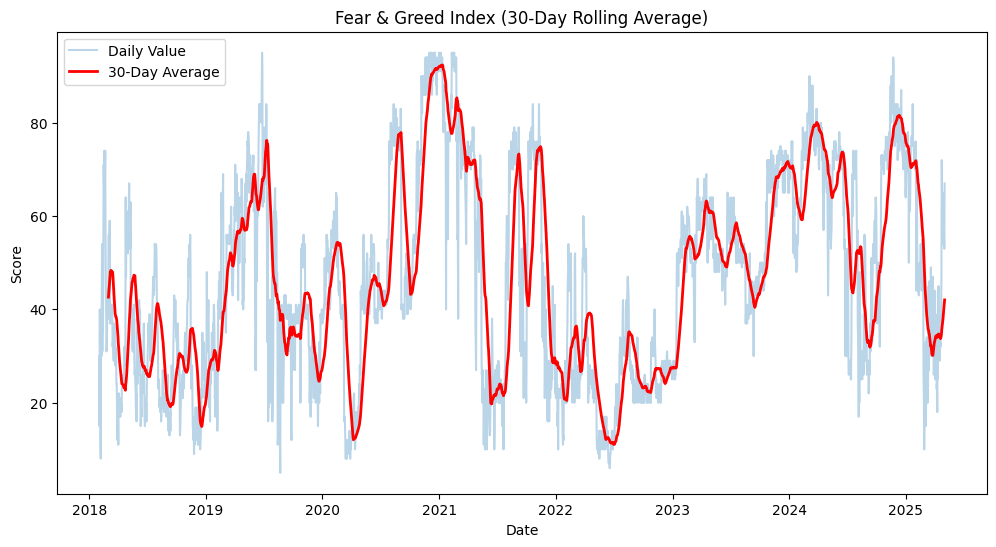

OSError: Cannot save file into a non-existent directory: 'csv_files'

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df['30d_avg'] = df['value'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['value'], alpha=0.3, label="Daily Value")
plt.plot(df['date'], df['30d_avg'], color="red", linewidth=2, label="30-Day Average")
plt.title("Fear & Greed Index (30-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Score")
plt.legend()
plt.savefig("outputs/fear_greed_rolling_avg.png")
plt.show()


df.to_csv("csv_files/fear_greed_processed.csv", index=False)

print(" Analysis Completed. Graphs saved in 'outputs/' and processed CSV in 'csv_files/'.")
